## Data Import and Cleaning##

In [302]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
#import folium
#from folium.plugins import HeatMap
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

evaluation = pd.DataFrame({'Model': [],
                           'Details':[],
                           'Root Mean Squared Error (RMSE)':[],
                           'R-squared (training)':[],
                           'Adjusted R-squared (training)':[],
                           'R-squared (test)':[],
                           'Adjusted R-squared (test)':[]})

In [448]:
df = pd.read_csv('Melbourne_housing_FULL.csv')

# assumptions check 

# date 

In [449]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,nan,SS,Jellis,3/09/2016,2.50,3067.00,...,1.00,1.00,126.00,nan,nan,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
1,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,...,1.00,1.00,202.00,nan,nan,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
2,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,...,1.00,0.00,156.00,79.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00
3,Abbotsford,18/659 Victoria St,3,u,nan,VB,Rounds,4/02/2016,2.50,3067.00,...,2.00,1.00,0.00,nan,nan,Yarra City Council,-37.81,145.01,Northern Metropolitan,4019.00
4,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,...,2.00,0.00,134.00,150.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00


In [465]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

In [466]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.00,27247.00,34856.00,34856.00,26640.00,26631.00,26129.00,23047.00,13742.00,15551.00,26881.00,26881.00,34854.00
mean,3.03,1050173.34,11.18,3116.06,3.08,1.62,1.73,593.60,160.26,1965.29,-37.81,145.00,7572.89
std,0.97,641467.13,6.79,109.02,0.98,0.72,1.01,3398.84,401.27,37.33,0.09,0.12,4428.09
min,1.00,85000.00,0.00,3000.00,0.00,0.00,0.00,0.00,0.00,1196.00,-38.19,144.42,83.00
25%,2.00,635000.00,6.40,3051.00,2.00,1.00,1.00,224.00,102.00,1940.00,-37.86,144.93,4385.00
50%,3.00,870000.00,10.30,3103.00,3.00,2.00,2.00,521.00,136.00,1970.00,-37.81,145.01,6763.00
75%,4.00,1295000.00,14.00,3156.00,4.00,2.00,2.00,670.00,188.00,2000.00,-37.75,145.07,10412.00
max,16.00,11200000.00,48.10,3978.00,30.00,12.00,26.00,433014.00,44515.00,2106.00,-37.39,145.53,21650.00


## Check for Multicollinearity of Features ##

In [456]:
copy_df = df
copy_df.head()

# creating copy of dataframe

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,nan,SS,Jellis,3/09/2016,2.50,3067.00,...,1.00,1.00,126.00,nan,nan,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
1,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,...,1.00,1.00,202.00,nan,nan,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
2,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,...,1.00,0.00,156.00,79.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00
3,Abbotsford,18/659 Victoria St,3,u,nan,VB,Rounds,4/02/2016,2.50,3067.00,...,2.00,1.00,0.00,nan,nan,Yarra City Council,-37.81,145.01,Northern Metropolitan,4019.00
4,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,...,2.00,0.00,134.00,150.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00


In [458]:
copy_df = copy_df.drop(['Price'], axis=1)
copy_df.head()

# dropping price from data frame

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,SS,Jellis,3/09/2016,2.50,3067.00,2.00,1.00,1.00,126.00,nan,nan,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
1,Abbotsford,85 Turner St,2,h,S,Biggin,3/12/2016,2.50,3067.00,2.00,1.00,1.00,202.00,nan,nan,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
2,Abbotsford,25 Bloomburg St,2,h,S,Biggin,4/02/2016,2.50,3067.00,2.00,1.00,0.00,156.00,79.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00
3,Abbotsford,18/659 Victoria St,3,u,VB,Rounds,4/02/2016,2.50,3067.00,3.00,2.00,1.00,0.00,nan,nan,Yarra City Council,-37.81,145.01,Northern Metropolitan,4019.00
4,Abbotsford,5 Charles St,3,h,SP,Biggin,4/03/2017,2.50,3067.00,3.00,2.00,0.00,134.00,150.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00


In [463]:
corr = copy_df.corr()
corr 

# creating correlation matrix for features 

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.00,0.27,0.09,0.95,0.61,0.39,0.04,0.16,-0.01,0.00,0.10,-0.07
Distance,0.27,1.00,0.48,0.27,0.13,0.24,0.06,0.08,0.32,-0.10,0.20,-0.02
Postcode,0.09,0.48,1.00,0.09,0.12,0.07,0.04,0.04,0.09,-0.23,0.36,0.02
Bedroom2,0.95,0.27,0.09,1.00,0.61,0.39,0.04,0.15,-0.00,0.00,0.11,-0.05
Bathroom,0.61,0.13,0.12,0.61,1.00,0.31,0.04,0.15,0.17,-0.06,0.11,-0.03
Car,0.39,0.24,0.07,0.39,0.31,1.00,0.04,0.10,0.13,-0.01,0.05,-0.01
Landsize,0.04,0.06,0.04,0.04,0.04,0.04,1.00,0.35,0.04,0.03,-0.00,-0.02
BuildingArea,0.16,0.08,0.04,0.15,0.15,0.10,0.35,1.00,0.07,0.02,-0.00,-0.02
YearBuilt,-0.01,0.32,0.09,-0.00,0.17,0.13,0.04,0.07,1.00,0.09,-0.02,0.02
Lattitude,0.00,-0.10,-0.23,0.00,-0.06,-0.01,0.03,0.02,0.09,1.00,-0.35,0.01


In [464]:
abs(copy_df.corr()) > 0.75

# Checking for high multicollinearity - bedroom2 is highly correlated to Rooms

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,True,False,False,True,False,False,False,False,False,False,False,False
Distance,False,True,False,False,False,False,False,False,False,False,False,False
Postcode,False,False,True,False,False,False,False,False,False,False,False,False
Bedroom2,True,False,False,True,False,False,False,False,False,False,False,False
Bathroom,False,False,False,False,True,False,False,False,False,False,False,False
Car,False,False,False,False,False,True,False,False,False,False,False,False
Landsize,False,False,False,False,False,False,True,False,False,False,False,False
BuildingArea,False,False,False,False,False,False,False,True,False,False,False,False
YearBuilt,False,False,False,False,False,False,False,False,True,False,False,False
Lattitude,False,False,False,False,False,False,False,False,False,True,False,False


## Clean data frame without NAN or missing values ##

In [554]:
new_df = df.dropna(axis = 0, how = 'any', inplace =False)

# dropping any rows with any missing NAN value

In [555]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8887 entries, 2 to 34856
Data columns (total 21 columns):
Suburb           8887 non-null object
Address          8887 non-null object
Rooms            8887 non-null int64
Type             8887 non-null object
Price            8887 non-null float64
Method           8887 non-null object
SellerG          8887 non-null object
Date             8887 non-null object
Distance         8887 non-null float64
Postcode         8887 non-null float64
Bedroom2         8887 non-null float64
Bathroom         8887 non-null float64
Car              8887 non-null float64
Landsize         8887 non-null float64
BuildingArea     8887 non-null float64
YearBuilt        8887 non-null float64
CouncilArea      8887 non-null object
Lattitude        8887 non-null float64
Longtitude       8887 non-null float64
Regionname       8887 non-null object
Propertycount    8887 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 1.5+ MB


In [556]:
new_df.shape


(8887, 21)

In [557]:
pd.options.display.float_format = "{:.2f}".format
new_df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,8887.00,8887.00,8887.00,8887.00,8887.00,8887.00,8887.00,8887.00,8887.00,8887.00,8887.00,8887.00,8887.00
mean,3.10,1092901.63,11.20,3111.66,3.08,1.65,1.69,523.48,149.31,1965.75,-37.80,144.99,7475.94
std,0.96,679381.90,6.81,112.61,0.97,0.72,0.98,1061.32,87.93,37.04,0.09,0.12,4375.02
min,1.00,131000.00,0.00,3000.00,0.00,1.00,0.00,0.00,0.00,1196.00,-38.17,144.42,249.00
25%,2.00,641000.00,6.40,3044.00,2.00,1.00,1.00,212.00,100.00,1945.00,-37.86,144.92,4382.50
50%,3.00,900000.00,10.20,3084.00,3.00,2.00,2.00,478.00,132.00,1970.00,-37.80,145.00,6567.00
75%,4.00,1345000.00,13.90,3150.00,4.00,2.00,2.00,652.00,180.00,2000.00,-37.75,145.06,10331.00
max,12.00,9000000.00,47.40,3977.00,12.00,9.00,10.00,42800.00,3112.00,2019.00,-37.41,145.53,21650.00


In [558]:
new_df['year_of_sale'] = new_df['Date'].astype(str)
new_df['year_of_sale']

# creating new column with date/year

2         4/02/2016
4         4/03/2017
6         4/06/2016
11        7/05/2016
14        8/10/2016
            ...    
34847    24/02/2018
34849    24/02/2018
34853    24/02/2018
34854    24/02/2018
34856    24/02/2018
Name: year_of_sale, Length: 8887, dtype: object

In [605]:
new_df['year_of_sale'].value_counts()

24/02/2018    227
27/05/2017    225
17/03/2018    214
3/03/2018     204
3/06/2017     202
             ... 
4/02/2016      16
11/03/2017      9
20/01/2018      7
30/09/2017      5
27/01/2018      2
Name: year_of_sale, Length: 77, dtype: int64

In [559]:
new_df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,year_of_sale
2,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,...,0.00,156.00,79.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00,4/02/2016
4,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,...,0.00,134.00,150.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00,4/03/2017
6,Abbotsford,55a Park St,4,h,1600000.00,VB,Nelson,4/06/2016,2.50,3067.00,...,2.00,120.00,142.00,2014.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00,4/06/2016
11,Abbotsford,124 Yarra St,3,h,1876000.00,S,Nelson,7/05/2016,2.50,3067.00,...,0.00,245.00,210.00,1910.00,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00,7/05/2016
14,Abbotsford,98 Charles St,2,h,1636000.00,S,Nelson,8/10/2016,2.50,3067.00,...,2.00,256.00,107.00,1890.00,Yarra City Council,-37.81,145.00,Northern Metropolitan,4019.00,8/10/2016


In [588]:
new_df['cost_per_sqmts'] = new_df['Price']/new_df['BuildingArea']
new_df['cost_per_sqmts']                                          
# creating per sq mts feature 

2       13101.27
4        9766.67
6       11267.61
11       8933.33
14      15289.72
          ...   
34847    4237.29
34849    3607.59
34853    8538.46
34854    5875.00
34856    9902.91
Name: cost_per_sqmts, Length: 8887, dtype: float64

In [589]:
new_df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,year_of_sale,month_of_sale,month,real_month,cost_per_sqmts
2,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,...,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00,4/02/2016,4/02,"[4, 02]","[4, 02]",13101.27
4,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,...,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00,4/03/2017,4/03,"[4, 03]","[4, 03]",9766.67
6,Abbotsford,55a Park St,4,h,1600000.00,VB,Nelson,4/06/2016,2.50,3067.00,...,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00,4/06/2016,4/06,"[4, 06]","[4, 06]",11267.61
11,Abbotsford,124 Yarra St,3,h,1876000.00,S,Nelson,7/05/2016,2.50,3067.00,...,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00,7/05/2016,7/05,"[7, 05]","[7, 05]",8933.33
14,Abbotsford,98 Charles St,2,h,1636000.00,S,Nelson,8/10/2016,2.50,3067.00,...,Yarra City Council,-37.81,145.00,Northern Metropolitan,4019.00,8/10/2016,8/10,"[8, 10]","[8, 10]",15289.72


In [595]:
avg_cost_per_sqmts_region = new_df.groupby('Regionname')['cost_per_sqmts'].mean()
avg_cost_per_sqmts_region

# groupby not working - why?

Regionname
Eastern Metropolitan             inf
Eastern Victoria             4566.76
Northern Metropolitan            inf
Northern Victoria            3781.50
South-Eastern Metropolitan       inf
Southern Metropolitan            inf
Western Metropolitan             inf
Western Victoria             3793.74
Name: cost_per_sqmts, dtype: float64

In [579]:
new_df['month_of_sale'] = new_df['year_of_sale'].str[:-5]
new_df['month_of_sale'] 

2         4/02
4         4/03
6         4/06
11        7/05
14        8/10
         ...  
34847    24/02
34849    24/02
34853    24/02
34854    24/02
34856    24/02
Name: month_of_sale, Length: 8887, dtype: object

In [598]:
new_df['month'] = new_df['month_of_sale'].str[-2:]
new_df['month']

#seperated out month 

2        02
4        03
6        06
11       05
14       10
         ..
34847    02
34849    02
34853    02
34854    02
34856    02
Name: month, Length: 8887, dtype: object

In [546]:
new_df['year_of_sale'] = new_df['year_of_sale'].str[-4:]

new_df['year_of_sale'].head()

#converting date/year to year 

2     2016
4     2017
6     2016
11    2016
14    2016
Name: year_of_sale, dtype: object

In [484]:
new_df['year_of_sale'].value_counts()

2017    4372
2016    3483
2018    1032
Name: year_of_sale, dtype: int64

In [485]:
new_df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount', 'year_of_sale'],
      dtype='object')

In [486]:
new_df['Suburb'].value_counts()

Reservoir         194
Richmond          155
Brunswick         152
Bentleigh East    138
Coburg            135
                 ... 
The Basin           1
Healesville         1
Gisborne South      1
Officer             1
Wattle Glen         1
Name: Suburb, Length: 315, dtype: int64

In [487]:
new_df['CouncilArea'].value_counts()

Boroondara City Council           810
Darebin City Council              729
Moreland City Council             647
Moonee Valley City Council        556
Glen Eira City Council            519
Maribyrnong City Council          490
Melbourne City Council            456
Brimbank City Council             416
Banyule City Council              413
Hume City Council                 390
Bayside City Council              362
Port Phillip City Council         329
Yarra City Council                323
Monash City Council               299
Hobsons Bay City Council          289
Stonnington City Council          280
Manningham City Council           267
Whittlesea City Council           242
Kingston City Council             209
Wyndham City Council              169
Whitehorse City Council           126
Maroondah City Council            107
Melton City Council               107
Knox City Council                 103
Frankston City Council             87
Greater Dandenong City Council     51
Casey City C

In [437]:
new_df['Regionname'].value_counts()
# anova 
# Question for Hannah - Ho: No difference in Mean pricing between top suburbs  Ha: There is a statistically significant diff between mean pricing in suburbs

Southern Metropolitan         2707
Northern Metropolitan         2612
Western Metropolitan          2059
Eastern Metropolitan           982
South-Eastern Metropolitan     371
Northern Victoria               62
Eastern Victoria                51
Western Victoria                43
Name: Regionname, dtype: int64

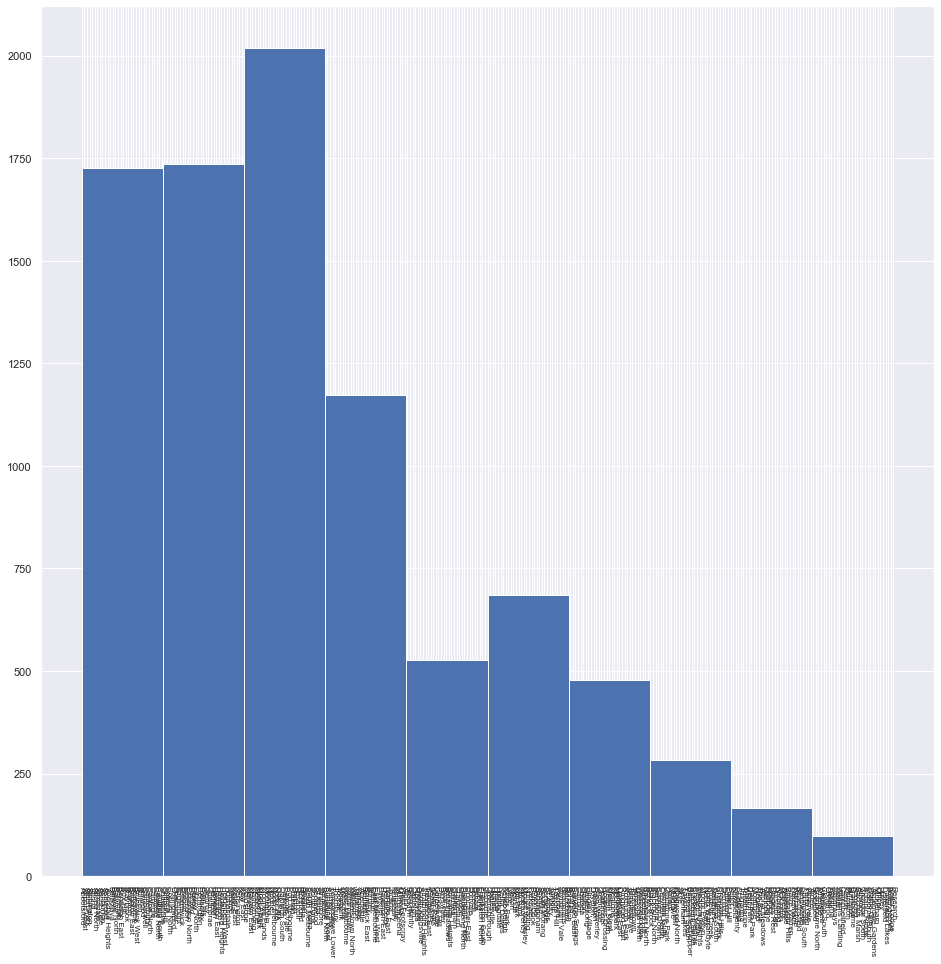

In [283]:
new_df.Suburb.hist(figsize=(16,16),xlabelsize='8', xrot=-90)

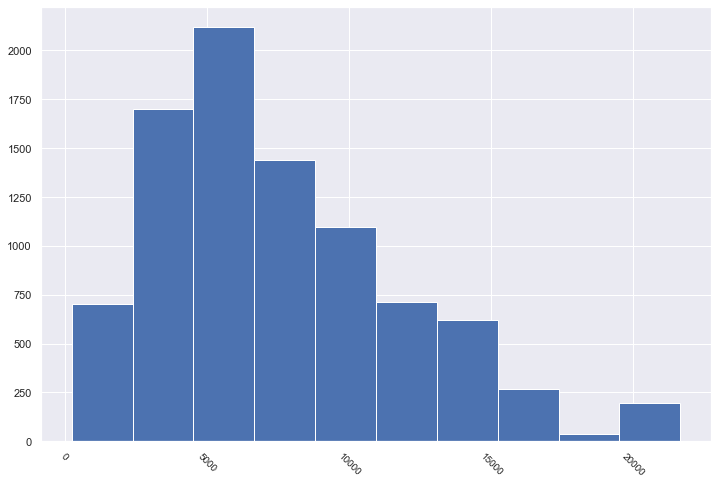

In [438]:
new_df.Propertycount.hist(figsize=(12,8),xlabelsize='10', xrot=-45)

In [439]:
avg_price_per_year =new_df.groupby('Regionname')['Price'].mean()
avg_price_per_year

Regionname
Eastern Metropolitan         1157120.50
Eastern Victoria              661842.78
Northern Metropolitan         877852.07
Northern Victoria             599040.32
South-Eastern Metropolitan    922715.88
Southern Metropolitan        1493322.95
Western Metropolitan          878367.19
Western Victoria              445802.33
Name: Price, dtype: float64

In [506]:
new_df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,year_of_sale
2,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,...,0.00,156.00,79.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00,2016
4,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,...,0.00,134.00,150.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00,2017
6,Abbotsford,55a Park St,4,h,1600000.00,VB,Nelson,4/06/2016,2.50,3067.00,...,2.00,120.00,142.00,2014.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00,2016
11,Abbotsford,124 Yarra St,3,h,1876000.00,S,Nelson,7/05/2016,2.50,3067.00,...,0.00,245.00,210.00,1910.00,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00,2016
14,Abbotsford,98 Charles St,2,h,1636000.00,S,Nelson,8/10/2016,2.50,3067.00,...,2.00,256.00,107.00,1890.00,Yarra City Council,-37.81,145.00,Northern Metropolitan,4019.00,2016


## Treatment for Outliers ## 

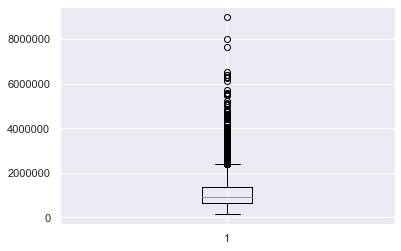

In [507]:
plt.boxplot(new_df["Price"])
plt.show()

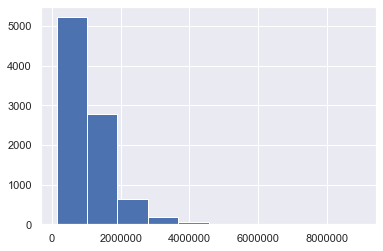

In [508]:
new_df.Price.hist()

In [509]:
print(new_df['Price'].skew())
new_df['Price'].describe()

2.4113965483321715


count      8887.00
mean    1092901.63
std      679381.90
min      131000.00
25%      641000.00
50%      900000.00
75%     1345000.00
max     9000000.00
Name: Price, dtype: float64

In [510]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


# Removing data beyond 3 Standard deviations from Mean (Price)

Rooms                2.00
Price           660000.00
Distance             7.60
Postcode           105.00
Bedroom2             2.00
Bathroom             1.00
Car                  1.00
Landsize           446.00
BuildingArea        86.00
YearBuilt           60.00
Lattitude            0.11
Longtitude           0.14
Propertycount     6027.00
dtype: float64


In [511]:
df_out = new_df[~((new_df < (Q1 - 3 * IQR)) |(new_df > (Q3 + 3 * IQR))).any(axis=1)]
print(df_out.shape)

(8313, 22)


In [512]:
print(df_out['Price'].skew())

1.2344668903388993


In [513]:
df_out.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,year_of_sale
2,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,...,0.00,156.00,79.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00,2016
4,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,...,0.00,134.00,150.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00,2017
6,Abbotsford,55a Park St,4,h,1600000.00,VB,Nelson,4/06/2016,2.50,3067.00,...,2.00,120.00,142.00,2014.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00,2016
11,Abbotsford,124 Yarra St,3,h,1876000.00,S,Nelson,7/05/2016,2.50,3067.00,...,0.00,245.00,210.00,1910.00,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00,2016
14,Abbotsford,98 Charles St,2,h,1636000.00,S,Nelson,8/10/2016,2.50,3067.00,...,2.00,256.00,107.00,1890.00,Yarra City Council,-37.81,145.00,Northern Metropolitan,4019.00,2016


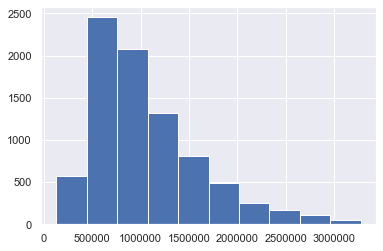

In [514]:
df_out.Price.hist()

In [ ]:
# Price Distributions:
# Overall Distribution: Most common values for house prices ranges from 600k - 620k.
# Exclusive Region: It seems that the Southern and Eastern Metropolitan are more exclusive compared to other regions.
# Less Exclusive: The regions of Victoria tends to bemore accesible compared to the exclusive regions.
# Gaussian Distribution: I will later use gaussian distribution in order to detect outliers

## Hypothesis Testing ##

In [505]:
df_out.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Year_of_sale,year_of_sale
2,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,...,156.00,79.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00,4/02/2016,2016
4,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,...,134.00,150.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00,4/03/2017,2017
6,Abbotsford,55a Park St,4,h,1600000.00,VB,Nelson,4/06/2016,2.50,3067.00,...,120.00,142.00,2014.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00,4/06/2016,2016
11,Abbotsford,124 Yarra St,3,h,1876000.00,S,Nelson,7/05/2016,2.50,3067.00,...,245.00,210.00,1910.00,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00,7/05/2016,2016
14,Abbotsford,98 Charles St,2,h,1636000.00,S,Nelson,8/10/2016,2.50,3067.00,...,256.00,107.00,1890.00,Yarra City Council,-37.81,145.00,Northern Metropolitan,4019.00,8/10/2016,2016


In [518]:
type(df_out['year_of_sale'])

pandas.core.series.Series

In [528]:
df_out['Regionname'].value_counts()

Southern Metropolitan         2524
Northern Metropolitan         2456
Western Metropolitan          1999
Eastern Metropolitan           952
South-Eastern Metropolitan     298
Western Victoria                40
Northern Victoria               30
Eastern Victoria                14
Name: Regionname, dtype: int64

In [ ]:
#need to split sales volumes (and revenues) by year by region 

In [529]:
df_out['year_of_sale'].value_counts()

2017    4028
2016    3358
2018     927
Name: year_of_sale, dtype: int64

## Ho: No difference in the average price between 

In [526]:
sum_revenues_per_region = df_out.groupby('Regionname')['Price'].sum()
sum_revenues_per_region

Regionname
Eastern Metropolitan         1077005331.00
Eastern Victoria               10707982.00
Northern Metropolitan        2164133009.00
Northern Victoria              17058500.00
South-Eastern Metropolitan    275462747.00
Southern Metropolitan        3475269331.00
Western Metropolitan         1747677054.00
Western Victoria               17634500.00
Name: Price, dtype: float64

## Basic EDA  ##

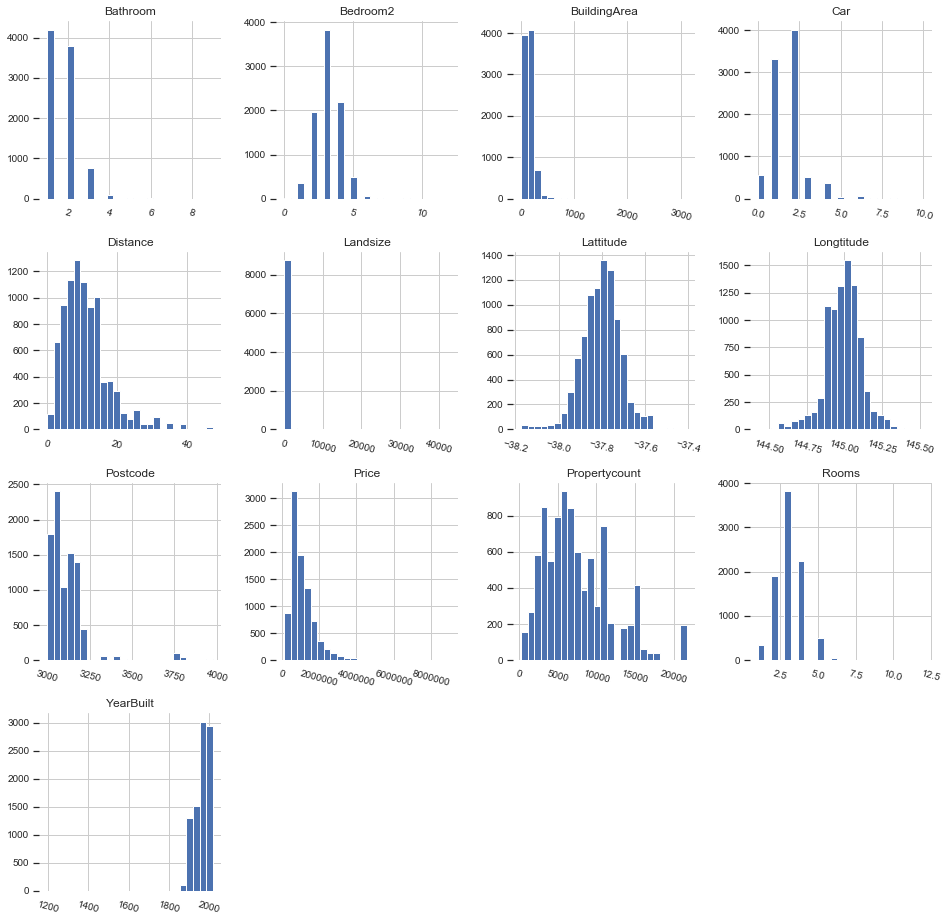

In [241]:
df1 =df_out[['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount']]
h = df1.hist(bins=25,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-15)
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

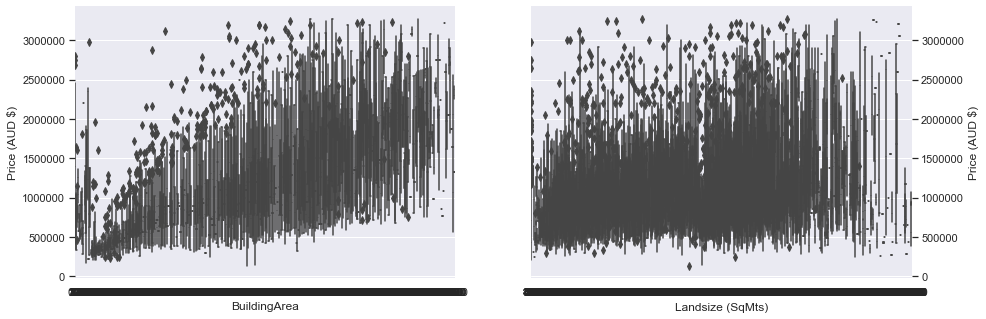

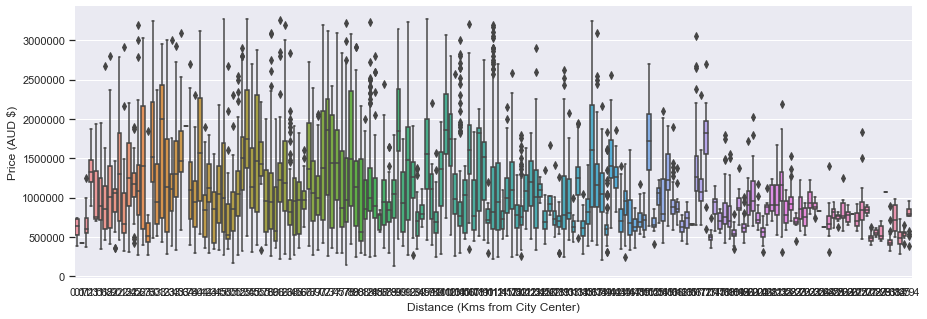

In [411]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=df_out['BuildingArea'],y=df['Price'], ax=axes[0])
sns.boxplot(x=df_out['Landsize'],y=df['Price'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='BuildingArea', ylabel='Price (AUD $)')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='Landsize (SqMts)', ylabel='Price (AUD $)')

f, axe = plt.subplots(1, 1,figsize=(15,5))
sns.boxplot(x=df_out['Distance'],y=df['Price'], ax=axe)
sns.despine(left=True, bottom=True)
axe.yaxis.tick_left()
axe.set(xlabel='Distance (Kms from City Center)', ylabel='Price (AUD $)');

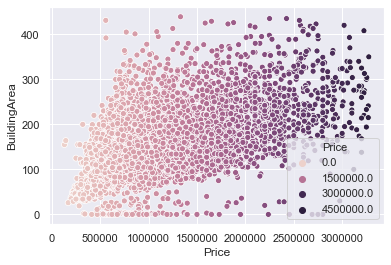

In [410]:
sns.set()
sns.scatterplot(df_out['Price'], df_out['BuildingArea'], hue=df_out['Price'])

# Graph 3 - exploring relationships between price and buildingarea

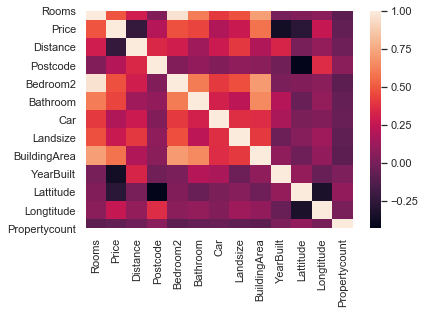

In [412]:
corr = df_out.corr()
 
# Heatmap
sns.heatmap(corr)

In [423]:
df_out.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount', 'Year_of_sale',
       'year_of_sale'],
      dtype='object')

## Checking Out the Correlation Among Explanatory Variables ##

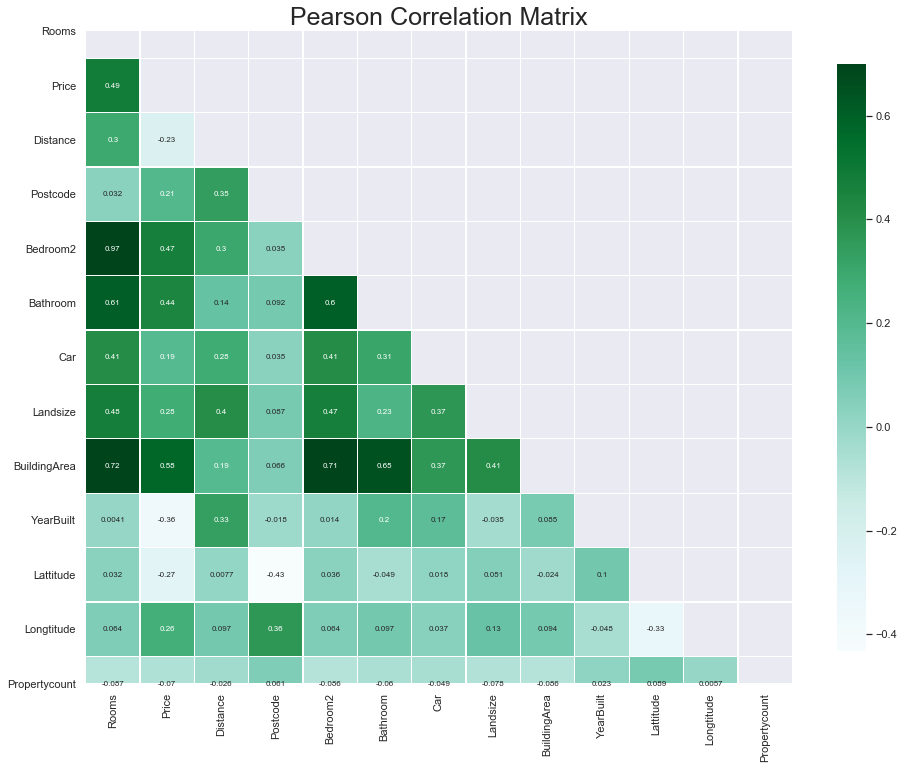

In [424]:
features = ['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount', 'Year_of_sale',
       'year_of_sale']

mask = np.zeros_like(df_out[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(df_out[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

In [ ]:
data_pred = df_out.iloc[:,1:8]
data_pred.head()

In [ ]:
pd.plotting.scatter_matrix(data_pred,figsize  = [9, 9]);
plt.show()

## Exploring key question on statistical difference in price between different sub-markets ##

In [ ]:
new_df.head()

In [ ]:
avg_price_per_submarket = new_df.groupby('Suburb')['Price'].mean().reset_index()
avg_price_per_submarket[1:-1]

## Data Split and Simple Regression Model ##

In [230]:
# def adjustedR2(r2,n,k):
#     return r2-(k-1)/(n-k)*(1-r2)

In [236]:
train_data,test_data = train_test_split(new_df,train_size = 0.8,random_state=3)

lr = linear_model.LinearRegression()
X_train = np.array(train_data['BuildingArea'], dtype=pd.Series).reshape(-1,1)
y_train = np.array(train_data['Price'], dtype=pd.Series)
lr.fit(X_train,y_train)

X_test = np.array(test_data['BuildingArea'], dtype=pd.Series).reshape(-1,1)
y_test = np.array(test_data['Price'], dtype=pd.Series)

pred = lr.predict(X_test)
rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
rtrsm = float(format(lr.score(X_train, y_train),'.3f'))
rtesm = float(format(lr.score(X_test, y_test),'.3f'))
cv = float(format(cross_val_score(lr,df[['BuildingArea']],df['Price'],cv=5).mean(),'.3f'))

print ("Average Price for Test Data: {:.3f}".format(y_test.mean()))
print('Intercept: {}'.format(lr.intercept_))
print('Coefficient: {}'.format(lr.coef_))

r = evaluation.shape[0]
evaluation.loc[r] = ['Simple Linear Regression','-',rmsesm,rtrsm,'-',rtesm,'-',cv]
evaluation

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [232]:
sns.set(style="white", font_scale=1)

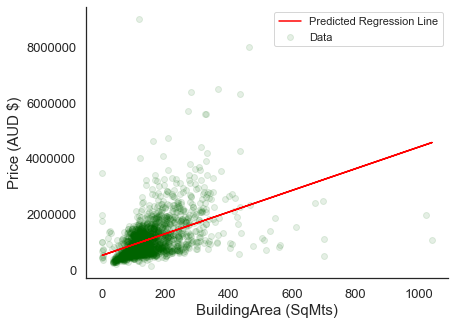

In [233]:
plt.figure(figsize=(6.5,5))
plt.scatter(X_test,y_test,color='darkgreen',label="Data", alpha=.1)
plt.plot(X_test,lr.predict(X_test),color="red",label="Predicted Regression Line")
plt.xlabel("BuildingArea (SqMts)", fontsize=15)
plt.ylabel("Price (AUD $)", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

In [135]:
#df = df.drop(['APARTMENT NUMBER','EASE-MENT','BOROUGH'],axis=1)

# dropped column = apartment number, borough (all values refer to Manhattan) & ease-ment since both contains nan values that are not going to be considered 

In [180]:
df_actual_sales = df.drop(df[df['SALE PRICE'] <11].index)
# dropping all sales prices less than $10 as they represent title transfers only (inheritence etc hence nominal sales
# consideration)

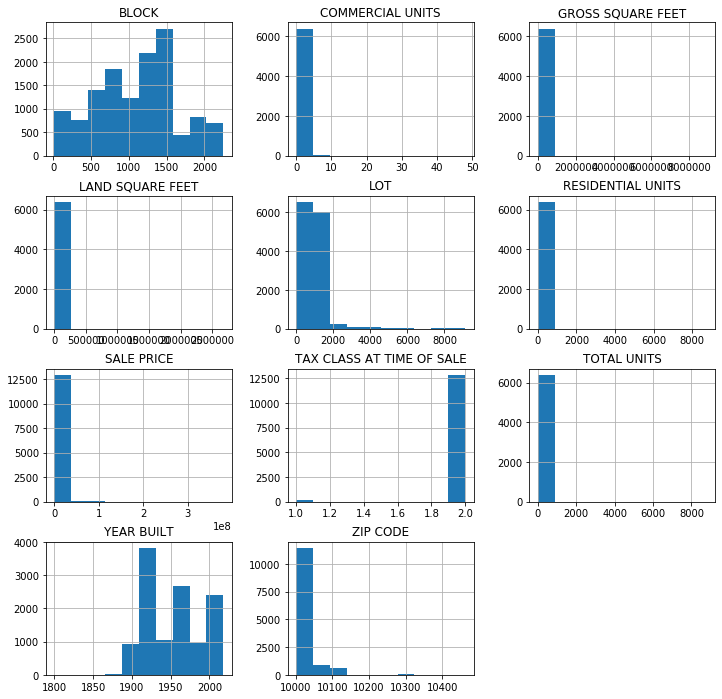

In [194]:
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (12,12))
ax = fig.gca()
df_actual_sales_clean.hist(ax = ax);

In [ ]:
# opportunity identification - big question - is it better to look for coop or condo to get best per sq ft realisation 
                                             # - new metric - compared to nearest 15 sales
# do we need box plots for specific variables
# what is the range of data spreads
# key variables 
# dependant variables - sales price 
# sub-groups of data to be compared for statistical difference (tests - z-test)
# study groupbys for condos vs coops to see which had a higher per sq ft realisation or what is same
# which independant variables are closely coorelated 
# 